In [1]:
import pip
pip.main(["install", "citipy"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from citipy import citipy

url = "http://api.openweathermap.org"
weather_api_keys = "26fa1690d0b37df46a13b72024fe58d4"
print(requests.get(url))

<Response [200]>


In [3]:
# Output File (CSV)
output_data_file = "/users/rebeccatast/desktop/Python-api-Challenge/WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_keys)

26fa1690d0b37df46a13b72024fe58d4


In [4]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [5]:
#Url for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26fa1690d0b37df46a13b72024fe58d4"
city_data =[]
print("Beginning Data Retrieval ")
print("-------------------------")

record_count =1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count +=1
    
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]
        
        city_data.append ({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp, 
                          "Humidity": city_humidity, 
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind, 
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("city not found.skipping...")
        pass
        
        print("-----------------------------")
        print("Data Retrieval Completed     ")
        print("-----------------------------")


Beginning Data Retrieval 
-------------------------
Processing Record 1 of Set 1 | paradwip
city not found.skipping...
-----------------------------
Data Retrieval Completed     
-----------------------------
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | mangaluru
Processing Record 12 of Set 1 | sinnamary
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | ratnagiri
Processing Record 15 of Set 1 | yirol
city not found.skipping...
-----------------------------
Data Retrieval Completed     
-----------------------------
Processing Record 16 of Set 1 | saleaula
city not found.skipping...
-----------------------------
Data Retrieval 

In [6]:
city_data_pd = pd.DataFrame (city_data)
city_data_pd.count()


City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,74.5,80,41,15.43,PF,1605286759
1,souillac,-20.52,57.52,75.2,83,20,3.36,MU,1605286759
2,hilo,19.73,-155.09,69.8,73,75,8.05,US,1605286759
3,ancud,-41.87,-73.82,54.0,81,75,11.41,CL,1605286760
4,klaksvik,62.23,-6.59,46.4,93,58,23.04,FO,1605286760


In [8]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.459791,23.676742,56.712195,74.353659,50.712544,7.805348,1.605287e+09
std,33.633126,89.654695,26.495546,18.179885,38.316801,5.584363,6.358091e+01
min,-54.800000,-175.200000,-20.290000,9.000000,0.000000,0.180000,1.605286e+09
25%,-6.790000,-56.135000,39.200000,65.000000,10.000000,3.745000,1.605287e+09
50%,21.750000,25.700000,64.400000,78.000000,48.500000,6.355000,1.605287e+09
75%,50.595000,102.462500,78.120000,88.000000,90.000000,10.290000,1.605287e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,34.450000,1.605287e+09


In [9]:
city_data = city_data_pd[(city_data_pd["Humidity"]>100)].index
city_data

Int64Index([], dtype='int64')

In [10]:
clean_city_data = city_data_pd.drop(city_data, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,74.5,80,41,15.43,PF,1605286759
1,souillac,-20.52,57.52,75.2,83,20,3.36,MU,1605286759
2,hilo,19.73,-155.09,69.8,73,75,8.05,US,1605286759
3,ancud,-41.87,-73.82,54.0,81,75,11.41,CL,1605286760
4,klaksvik,62.23,-6.59,46.4,93,58,23.04,FO,1605286760


In [11]:
lats = clean_city_data ["Lat"]
max_temps = clean_city_data ["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data ["Cloudiness"]
wind_speed = clean_city_data ["Wind Speed"]
clean_city_data.to_csv(output_data_file, index_label="City_ID")

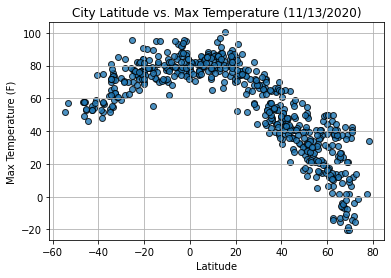

In [12]:
#Scatter Plot latitude vs. temperature
plt.scatter(lats,
           max_temps, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label ="Cities")
plt.title("City Latitude vs. Max Temperature (%s)"%time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("/users/rebeccatast/desktop/Python-api-Challenge/WeatherPy/Fig1.png")

plt.show()


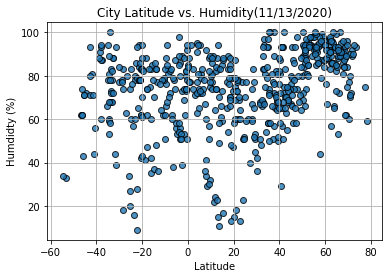

In [13]:
#Scatter Plot latitude vs. humidity
plt.scatter(lats,
           humidity, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label ="Cities")
plt.title("City Latitude vs. Humidity(%s)"%time.strftime("%x"))
plt.ylabel("Humdidty (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("/users/rebeccatast/desktop/Python-api-Challenge/WeatherPy/Fig2.png")

plt.show()


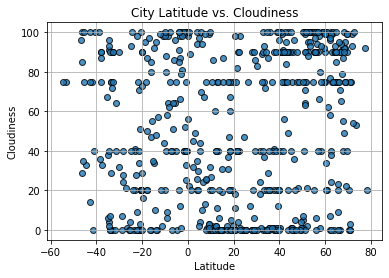

In [14]:
#Scatter Plot latitude vs. cloudiness
plt.scatter(lats,
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label ="Cities")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("/users/rebeccatast/desktop/Python-api-Challenge/WeatherPy/Fig3.png")

plt.show()

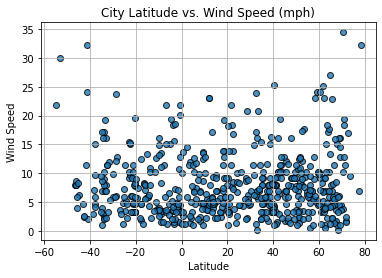

In [15]:
#Scatter Plot latitude vs. wind speed
plt.scatter(lats,
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label ="Cities")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("/users/rebeccatast/desktop/Python-api-Challenge/WeatherPy/Fig4.png")

plt.show()

In [26]:
#Linear Regression Plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equa = "y=" + str(round(slope,2))+ "x+" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_equa, text_coordinates, fontsize =15, color ="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
          
    

In [27]:
#Northern and Southern Hemisphere DataFrames
northern_hem_df = city_data_pd.loc[(city_data_pd["Lat"]>= 0)]
southern_hem_df = city_data_pd.loc[(city_data_pd["Lat"]< 0)]


The r-value is: 0.7939830935664429


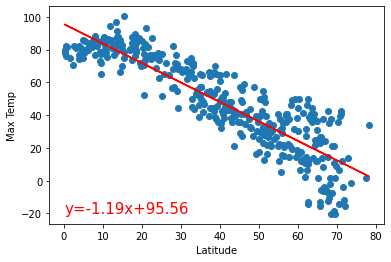

In [40]:
#Regression on Northern Hemisphere vs. Max Temp
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (0,-20))


The r-value is: 0.5182864071528457


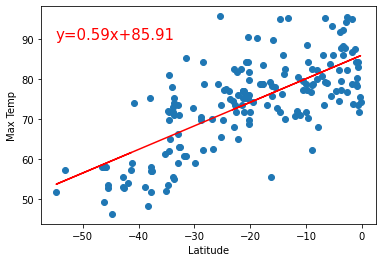

In [33]:
#Regression on Southern Hemisphere vs. Max Temp
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,90))

The r-value of .79 shows a strong relationship between Max Temperature and Latitude in the Northern Hemishphere, however there is a moderate positive correlation(r =.52) between Max Temperature and Latitude in the Southern Hemishphere. Both regression analyses show that, as a general rule, the highest temperatures are found closest to the equator.  



The r-value is: 0.16904573023241978


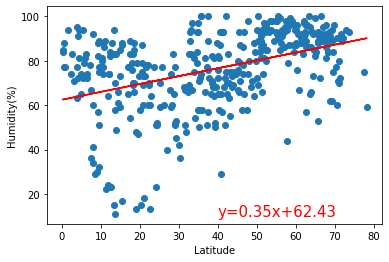

In [30]:
#Regression on Northern Hemisphere vs. Humidity
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity(%)", (40,10))

The r-value is: 0.002840499707295999


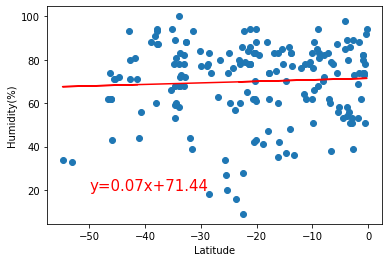

In [32]:
#Regression on Southern Hemisphere vs. Humidity
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity(%)", (-50,20))

The low r-values shown when comparing Northern Hemisphere and humidity (r=.17) and Southern Hemisphere and humidity (r=.002)
show that there is no relationship between hemisphere and percentage of humidity. 

The r-value is: 0.10955950136554636


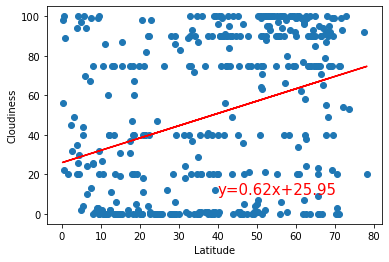

In [34]:
#Regression on Northern Hemisphere vs. Cloudiness
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.005940089786791758


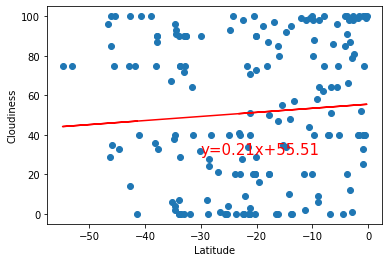

In [35]:
#Regression on Southern Hemisphere vs. Cloudiness
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

The low r-values shown when comparing Northern Hemisphere and cloudiness (r=.11) and Southern Hemisphere and cloudiness (r=.005)
show that there is no relationship between hemisphere and cloudiness. 

The r-value is: 0.010178769416840395


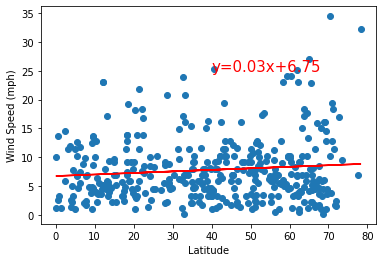

In [36]:
#Regression on Northern Hemisphere vs. Wind Speed
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed (mph)", (40,25))

The r-value is: 0.024756070018568044


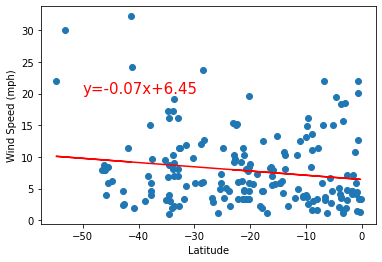

In [38]:
#Regression on Southern Hemisphere vs. Wind Speed
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed (mph)", (-50,20))

The low r-values shown when comparing Northern Hemisphere and wind speed (r=.01) and Southern Hemisphere and wind speed (r=.02) show that there is no relationship between hemisphere and wind speed.